<a href="https://colab.research.google.com/github/Skythianos/skythianos.github.io/blob/main/Copy_of_Copy_of_KonCept512_(kuti_version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install and load libraries

In [ ]:
%%capture

# Setup paths
drive_mount = '/content/drive/'
drive_root = drive_mount + 'My Drive/research/data/'  # persistent storage for dataset images
data_root = '/content/koniq/'                         # library install path

!pip install kuti
!git clone https://github.com/subpic/koniq.git
!pip install munch

In [ ]:
from kuti import model_helper as mh
from kuti import applications as apps
from kuti import tensor_ops as ops
from kuti import generic as gen
from kuti import image_utils as iu

import pandas as pd, numpy as np, os
from matplotlib import pyplot as plt
from munch import Munch

from google.colab import drive
drive.mount(drive_mount)

Loaded Kuti
Mounted at /content/drive/


### Setup KonIQ-10k dataset images
Download images resized to 512x384 pixels (originals are 1024x768)

In [ ]:
%%capture

gen.make_dirs(drive_root+'koniq/')
drive_image_path = drive_root+'koniq/koniq10k_512x384.zip'
if not os.path.exists(drive_image_path):
  !wget -O "$drive_image_path" "http://datasets.vqa.mmsp-kn.de/archives/koniq10k_512x384.zip"

gen.make_dirs(data_root+'images/')
data_images_path = data_root+'images/'
!cp  "$drive_image_path" "$data_images_path"
%cd $data_images_path
!unzip -o koniq10k_512x384.zip
%cd $data_root

### Define the DF-CNN-IQA model

In [ ]:
from tensorflow.keras.models import Model

ids = pd.read_csv(data_root + 'metadata/koniq10k_distributions_sets.csv')

# Build scoring model
base_model_NASNetMobile, preprocess_fn_NASNetMobile = apps.get_model_imagenet(apps.NASNetMobile)
base_model_InceptionV3, preprocess_fn_InceptionV3   = apps.get_model_imagenet(apps.InceptionV3)
base_model_VGG16, preprocess_fn_VGG16   = apps.get_model_imagenet(apps.VGG16)
base_model_ResNet50, preprocess_fn_ResNet50   = apps.get_model_imagenet(apps.ResNet50)
base_model_InceptionResNetV2, preprocess_fn_InceptionResNetV2   = apps.get_model_imagenet(apps.InceptionResNetV2)
base_model_DenseNet201, preprocess_fn_DenseNet201   = apps.get_model_imagenet(apps.DenseNet201)

head_1 = apps.fc_layers(base_model_NASNetMobile.output, name='fc', fc_sizes = [2048, 1024, 256, 1], dropout_rates = [0.25, 0.25, 0.5, 0], batch_norm    = 2)
head_2 = apps.fc_layers(base_model_InceptionV3.output, name='fc', fc_sizes = [2048, 1024, 256, 1], dropout_rates = [0.25, 0.25, 0.5, 0], batch_norm    = 2)
head_3 = apps.fc_layers(base_model_VGG16.output, name='fc', fc_sizes = [2048, 1024, 256, 1], dropout_rates = [0.25, 0.25, 0.5, 0], batch_norm    = 2)
head_4 = apps.fc_layers(base_model_ResNet50.output, name='fc', fc_sizes = [2048, 1024, 256, 1], dropout_rates = [0.25, 0.25, 0.5, 0], batch_norm    = 2)
head_5 = apps.fc_layers(base_model_InceptionResNetV2.output, name='fc', fc_sizes = [2048, 1024, 256, 1], dropout_rates = [0.25, 0.25, 0.5, 0], batch_norm    = 2)
head_6 = apps.fc_layers(base_model_DenseNet201.output, name='fc', fc_sizes = [2048, 1024, 256, 1], dropout_rates = [0.25, 0.25, 0.5, 0], batch_norm    = 2)    

model_1 = Model(inputs = base_model_NASNetMobile.input, outputs = head_1)
model_2 = Model(inputs = base_model_InceptionV3.input, outputs = head_2)
model_3 = Model(inputs = base_model_VGG16.input, outputs = head_3)
model_4 = Model(inputs = base_model_ResNet50.input, outputs = head_4)
model_5 = Model(inputs = base_model_InceptionResNetV2.input, outputs = head_5)
model_6 = Model(inputs = base_model_DenseNet201.input, outputs = head_6)

# Parameters of the generator
pre_1 = lambda im: preprocess_fn_NASNetMobile(iu.ImageAugmenter(im, remap=False).fliplr().result)
pre_2 = lambda im: preprocess_fn_InceptionV3(iu.ImageAugmenter(im, remap=False).fliplr().result)
pre_3 = lambda im: preprocess_fn_VGG16(iu.ImageAugmenter(im, remap=False).fliplr().result)
pre_4 = lambda im: preprocess_fn_ResNet50(iu.ImageAugmenter(im, remap=False).fliplr().result)
pre_5 = lambda im: preprocess_fn_InceptionResNetV2(iu.ImageAugmenter(im, remap=False).fliplr().result)
pre_6 = lambda im: preprocess_fn_DenseNet201(iu.ImageAugmenter(im, remap=False).fliplr().result)

gen_params_1 = dict(batch_size = 16, data_path = data_root+'images/512x384/', process_fn = pre_1, input_shape = (384,512,3), inputs = ['image_name'], outputs = ['MOS'])
gen_params_2 = dict(batch_size = 16, data_path = data_root+'images/512x384/', process_fn = pre_2, input_shape = (384,512,3), inputs = ['image_name'], outputs = ['MOS'])
gen_params_3 = dict(batch_size = 16, data_path = data_root+'images/512x384/', process_fn = pre_3, input_shape = (384,512,3), inputs = ['image_name'], outputs = ['MOS'])
gen_params_4 = dict(batch_size = 16, data_path = data_root+'images/512x384/', process_fn = pre_4, input_shape = (384,512,3), inputs = ['image_name'], outputs = ['MOS'])
gen_params_5 = dict(batch_size = 16, data_path = data_root+'images/512x384/', process_fn = pre_5, input_shape = (384,512,3), inputs = ['image_name'], outputs = ['MOS'])
gen_params_6 = dict(batch_size = 16, data_path = data_root+'images/512x384/', process_fn = pre_6, input_shape = (384,512,3), inputs = ['image_name'], outputs = ['MOS'])

# Wrapper for the model, helps with training and testing
helper_1 = mh.ModelHelper(model_1, 'Model_1', ids, loss='MSE', metrics=["MAE", ops.plcc_tf], monitor_metric = 'val_loss', monitor_mode   = 'min', 
                     multiproc = True, workers = 5, logs_root = drive_root + 'logs/koniq', models_root = drive_root + 'models/koniq', gen_params = gen_params_1)
helper_2 = mh.ModelHelper(model_2, 'Model_2', ids, loss='MSE', metrics=["MAE", ops.plcc_tf], monitor_metric = 'val_loss', monitor_mode   = 'min', 
                     multiproc = True, workers = 5, logs_root = drive_root + 'logs/koniq', models_root = drive_root + 'models/koniq', gen_params = gen_params_2)
helper_3 = mh.ModelHelper(model_3, 'Model_3', ids, loss='MSE', metrics=["MAE", ops.plcc_tf], monitor_metric = 'val_loss', monitor_mode   = 'min', 
                     multiproc = True, workers = 5, logs_root = drive_root + 'logs/koniq', models_root = drive_root + 'models/koniq', gen_params = gen_params_3)
helper_4 = mh.ModelHelper(model_4, 'Model_4', ids, loss='MSE', metrics=["MAE", ops.plcc_tf], monitor_metric = 'val_loss', monitor_mode   = 'min', 
                     multiproc = True, workers = 5, logs_root = drive_root + 'logs/koniq', models_root = drive_root + 'models/koniq', gen_params = gen_params_4)
helper_5 = mh.ModelHelper(model_5, 'Model_5', ids, loss='MSE', metrics=["MAE", ops.plcc_tf], monitor_metric = 'val_loss', monitor_mode   = 'min', 
                     multiproc = True, workers = 5, logs_root = drive_root + 'logs/koniq', models_root = drive_root + 'models/koniq', gen_params = gen_params_5)
helper_6 = mh.ModelHelper(model_6, 'Model_6', ids, loss='MSE', metrics=["MAE", ops.plcc_tf], monitor_metric = 'val_loss', monitor_mode   = 'min', 
                     multiproc = True, workers = 5, logs_root = drive_root + 'logs/koniq', models_root = drive_root + 'models/koniq', gen_params = gen_params_6)

Loading model NASNetMobile
24240128/24227760 [==============================] - 0s 0us/step
Loading model InceptionV3
87924736/87910968 [==============================] - 1s 0us/step
Loading model VGG16
58900480/58889256 [==============================] - 1s 0us/step
Loading model ResNet50
94781440/94765736 [==============================] - 1s 0us/step
Loading model InceptionResNetV2
219070464/219055592 [==============================] - 3s 0us/step
Loading model DenseNet201
74850304/74836368 [==============================] - 2s 0us/step


### Train it

In [ ]:
# do validation in memory
valid_gen = helper_1.make_generator(ids[ids.set=='validation'], batch_size = 16)

helper_1.train(valid_gen=valid_gen, lr=1e-4, epochs=1)
helper_1.load_model()
#helper.train(valid_gen=valid_gen, lr=1e-4/5, epochs=20)

helper_2.train(valid_gen=valid_gen, lr=1e-4, epochs=1)
helper_2.load_model()
#helper.train(valid_gen=valid_gen, lr=1e-4/5, epochs=20)

helper_3.train(valid_gen=valid_gen, lr=1e-4, epochs=1)
helper_3.load_model()
#helper.train(valid_gen=valid_gen, lr=1e-4/5, epochs=20)

helper_4.train(valid_gen=valid_gen, lr=1e-4, epochs=1)
helper_4.load_model()
#helper.train(valid_gen=valid_gen, lr=1e-4/5, epochs=20)

helper_5.train(valid_gen=valid_gen, lr=1e-4, epochs=1)
helper_5.load_model()
#helper.train(valid_gen=valid_gen, lr=1e-4/5, epochs=20)

helper_6.train(valid_gen=valid_gen, lr=1e-4, epochs=1)
helper_6.load_model()
#helper.train(valid_gen=valid_gen, lr=1e-4/5, epochs=20)

Training model: Model_1/bsz:16 i:1[384,512,3] l:MSE o:1[1]


/usr/local/lib/python3.7/dist-packages/kuti/model_helper.py:333: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  verbose             = verbose)


442/442 [==============================] - 468s 961ms/step - loss: 3550.3403 - MAE: 58.2618 - plcc_tf: 0.6167 - val_loss: 2893.3362 - val_MAE: 52.6542 - val_plcc_tf: 0.7119
Model weights loaded: Model_1/bsz:16 i:1[384,512,3] l:MSE o:1[1]_best_weights.h5
Training model: Model_2/bsz:16 i:1[384,512,3] l:MSE o:1[1]


/usr/local/lib/python3.7/dist-packages/kuti/model_helper.py:333: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  verbose             = verbose)


442/442 [==============================] - 173s 360ms/step - loss: 3527.7988 - MAE: 58.2921 - plcc_tf: 0.7098 - val_loss: 3086.2026 - val_MAE: 54.9187 - val_plcc_tf: 0.8391
Model weights loaded: Model_2/bsz:16 i:1[384,512,3] l:MSE o:1[1]_best_weights.h5
Training model: Model_3/bsz:16 i:1[384,512,3] l:MSE o:1[1]


/usr/local/lib/python3.7/dist-packages/kuti/model_helper.py:333: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  verbose             = verbose)


442/442 [==============================] - 216s 464ms/step - loss: 3579.7402 - MAE: 58.3052 - plcc_tf: 0.5010 - val_loss: 7256.1216 - val_MAE: 83.8010 - val_plcc_tf: 0.5359
Model weights loaded: Model_3/bsz:16 i:1[384,512,3] l:MSE o:1[1]_best_weights.h5
Training model: Model_4/bsz:16 i:1[384,512,3] l:MSE o:1[1]


/usr/local/lib/python3.7/dist-packages/kuti/model_helper.py:333: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  verbose             = verbose)


442/442 [==============================] - 183s 387ms/step - loss: 3524.6995 - MAE: 58.3239 - plcc_tf: 0.7344 - val_loss: 4647.7290 - val_MAE: 66.2833 - val_plcc_tf: -0.3639
Model weights loaded: Model_4/bsz:16 i:1[384,512,3] l:MSE o:1[1]_best_weights.h5
Training model: Model_5/bsz:16 i:1[384,512,3] l:MSE o:1[1]


/usr/local/lib/python3.7/dist-packages/kuti/model_helper.py:333: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  verbose             = verbose)


442/442 [==============================] - 358s 745ms/step - loss: 3537.0706 - MAE: 58.2999 - plcc_tf: 0.6715 - val_loss: 2880.5188 - val_MAE: 52.8261 - val_plcc_tf: 0.7885
Model weights loaded: Model_5/bsz:16 i:1[384,512,3] l:MSE o:1[1]_best_weights.h5


True

### Test model on the default test set

/usr/local/lib/python3.7/dist-packages/kuti/model_helper.py:417: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  use_multiprocessing=False)
/usr/local/lib/python3.7/dist-packages/kuti/model_helper.py:417: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  use_multiprocessing=False)
/usr/local/lib/python3.7/dist-packages/kuti/model_helper.py:417: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  use_multiprocessing=False)
/usr/local/lib/python3.7/dist-packages/kuti/model_helper.py:417: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  use_multiprocessing=False)
/usr/local/lib/python3.7/dis

SRCC: 0.829 | PLCC: 0.862 | MAE: 56.047 | RMSE: 56.616


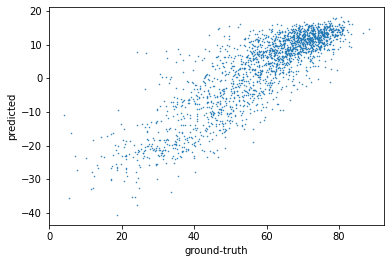

(0.829, 0.862, 56.047, 56.616)

In [ ]:
y_pred_1 = helper_1.predict()
y_pred_2 = helper_2.predict()
y_pred_3 = helper_3.predict()
y_pred_4 = helper_4.predict()
y_pred_5 = helper_5.predict()
y_pred_6 = helper_6.predict()
y_true = ids[ids.set=='test'].MOS.values

tmp = np.array([y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6])
y_pred = np.median(tmp, axis=0)
apps.rating_metrics(y_true, y_pred)

SRCC: 0.77 | PLCC: 0.806 | MAE: 53.275 | RMSE: 54.057


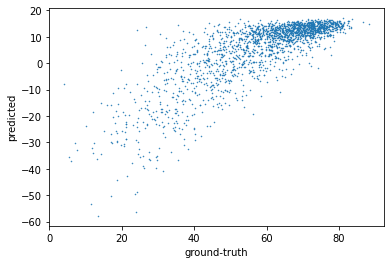

(0.77, 0.806, 53.275, 54.057)

In [ ]:
apps.rating_metrics(y_true, y_pred_5)